<a href="https://colab.research.google.com/github/sanjanabhakat26/Housing_Data/blob/main/House_Prices_Multilinear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!kaggle datasets download -d ruchi798/housing-prices-in-metropolitan-areas-of-india -f Chennai.csv

Chennai.csv: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import pandas as pd
df = pd.read_csv('Chennai.csv')
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,5500000,1310,Perungalathur,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,Madhavaram,2,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,8205000,1307,Karapakkam,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,23400000,3600,Thiruvidandhai,3,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10100000,1700,Iyappanthangal,3,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [7]:
df.shape

(5014, 40)

In [8]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 1
Integer variables: 39
Float variables: 0


In [9]:
data= df[['Price','Area','Location','No. of Bedrooms','Resale','ATM','MultipurposeRoom']]
data

,Price,Area,Location,No. of Bedrooms,Resale,ATM,MultipurposeRoom
0,5500000,1310,Perungalathur,3,0,0,0
1,5350000,1126,Madhavaram,2,0,0,1
2,8205000,1307,Karapakkam,3,0,0,1
3,23400000,3600,Thiruvidandhai,3,0,0,0
4,10100000,1700,Iyappanthangal,3,0,0,1
...,...,...,...,...,...,...,...
5009,7834999,1599,Korattur,3,0,9,9
5010,2408000,740,Ambattur,2,0,9,9
5011,5500000,1700,Pallikaranai VGP Shanti Nagar,3,0,9,9
5012,3400000,1599,Korattur,3,0,9,9


<Axes: >

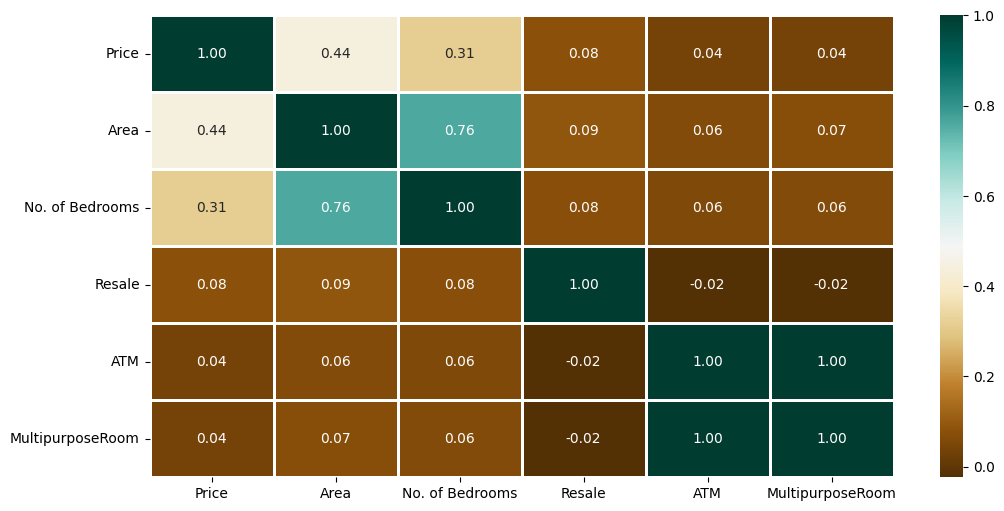

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),
			cmap = 'BrBG',
			fmt = '.2f',
			linewidths = 2,
			annot = True)

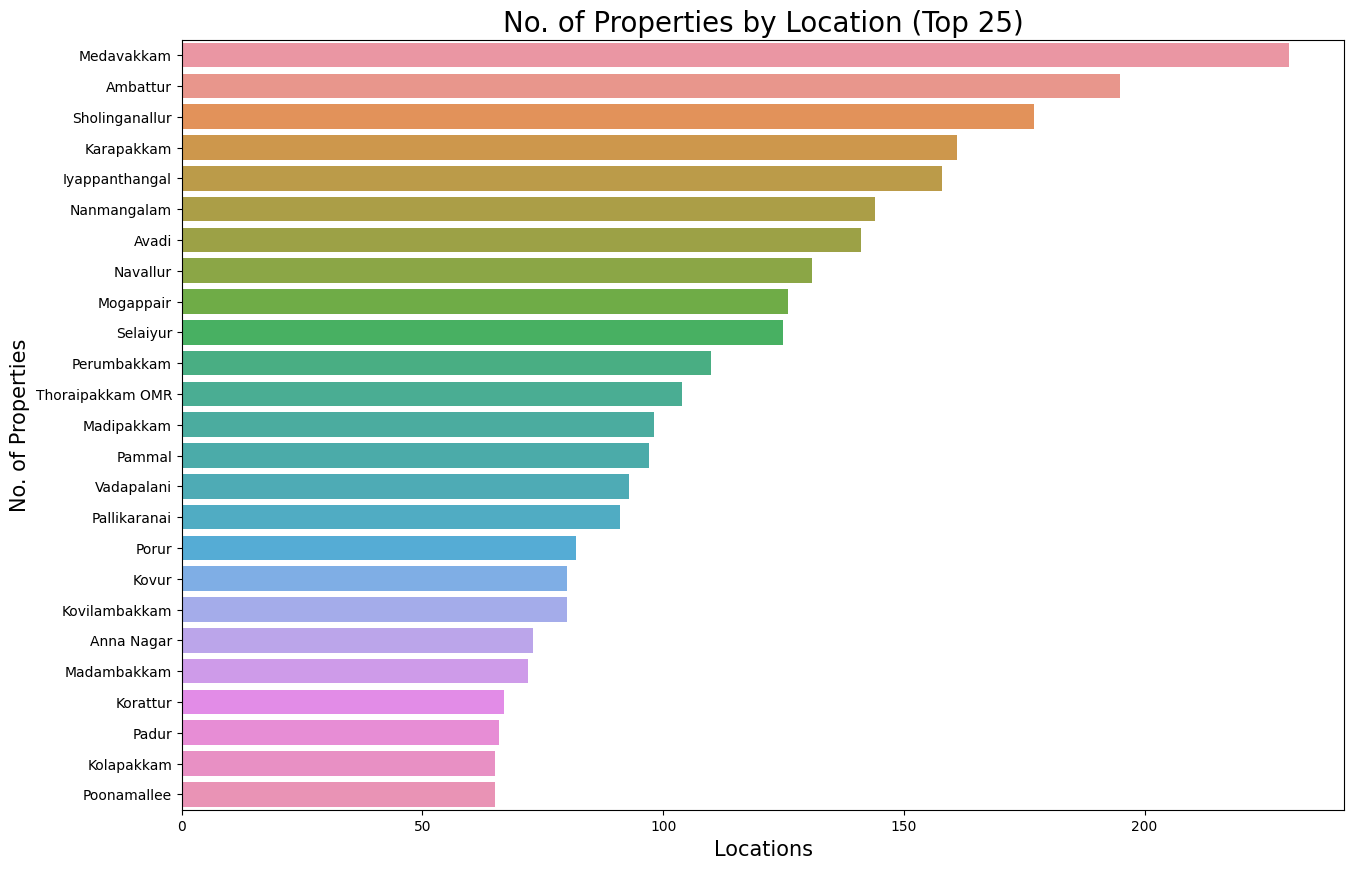

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('No. of Properties by Location (Top 25)', fontsize=20)
sns.countplot(y='Location', data=df, order=df.Location.value_counts().index[:25])
ax.set_xlabel('Locations', fontsize=15)
ax.set_ylabel('No. of Properties', fontsize=15)
plt.show()

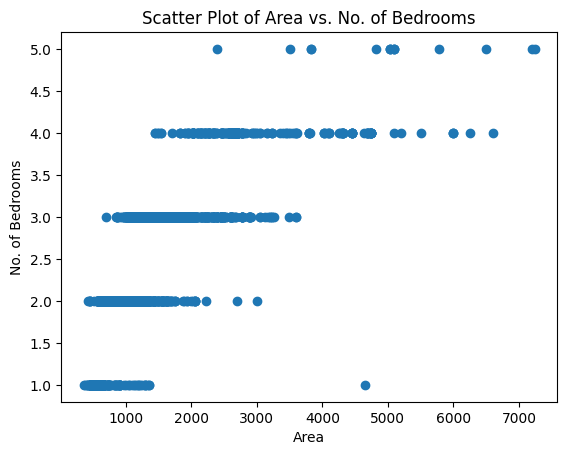

In [12]:
plt.scatter(df['Area'], df['No. of Bedrooms'])
plt.xlabel('Area')
plt.ylabel('No. of Bedrooms')
plt.title('Scatter Plot of Area vs. No. of Bedrooms')
plt.show()

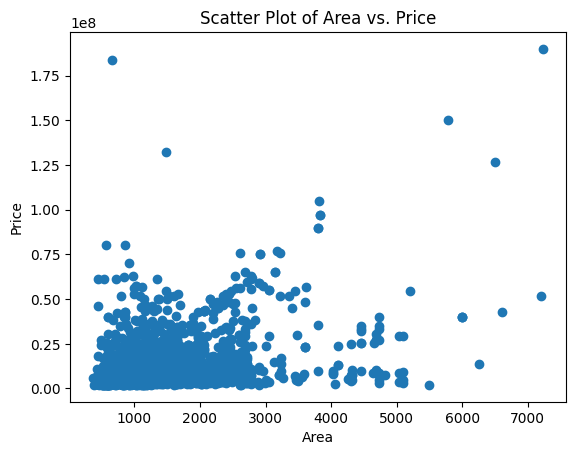

In [13]:
plt.scatter(df['Area'], df['Price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot of Area vs. Price')
plt.show()

In [14]:
data['Price'] = data['Price'].fillna(
data['Price'].mean())


<ipython-input-14-6327aa64fc2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].fillna(


In [15]:
dp=data[(data['Area']>7000) & (data['Price']>15000000)].index
data.drop(dp,inplace=True)

<ipython-input-15-ee82531498ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(dp,inplace=True)


In [16]:
new_dataset = data.dropna()

In [17]:
new_dataset.isnull().sum()

Price               0
Area                0
Location            0
No. of Bedrooms     0
Resale              0
ATM                 0
MultipurposeRoom    0
dtype: int64

In [18]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
	len(object_cols))


Categorical variables:
['Location']
No. of. categorical features:  1


In [19]:
data=data.drop(['Location'], axis=1)
data

,Price,Area,No. of Bedrooms,Resale,ATM,MultipurposeRoom
0,5500000,1310,3,0,0,0
1,5350000,1126,2,0,0,1
2,8205000,1307,3,0,0,1
3,23400000,3600,3,0,0,0
4,10100000,1700,3,0,0,1
...,...,...,...,...,...,...
5009,7834999,1599,3,0,9,9
5010,2408000,740,2,0,9,9
5011,5500000,1700,3,0,9,9
5012,3400000,1599,3,0,9,9


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = data.drop(['Price'], axis=1)
Y = data['Price']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [21]:
X_valid

,Area,No. of Bedrooms,Resale,ATM,MultipurposeRoom
2511,1025,2,0,9,9
2061,721,2,0,0,0
2924,721,2,0,9,9
3242,920,2,0,9,9
1172,1285,3,0,0,0
...,...,...,...,...,...
4383,1564,3,0,9,9
2927,1551,3,0,9,9
401,1000,2,1,0,0
1835,1194,2,1,0,0


In [22]:
model=LinearRegression()
model.fit(X_train, Y_train)
print("Model training completed")

Model training completed


In [23]:
r_square=model.score(X_train,Y_train)
r_square

0.1740087552961319

In [24]:
print(model.intercept_)
print(model.coef_)

977177.3593693553
[   7003.36004014 -557179.41079787 1508962.52267672  -86072.74262301
  146878.21759729]


In [25]:
predict_y=model.predict(X_valid)
predict_y

array([7588511.85368461, 4912241.12671381, 5459490.40148236, ...,
       8375141.1005893 , 9733792.94837626, 5031298.24739617])

In [26]:
actual_pred=pd.DataFrame({'Actual Price':Y_valid,'Predicted Price':predict_y})
actual_pred['Predicted Price']=actual_pred['Predicted Price'].astype('int64')
actual_pred

,Actual Price,Predicted Price
2511,4508000,7588511
2061,3881000,4912241
2924,6659999,5459490
3242,4518000,6853159
1172,6425000,8304956
...,...,...
4383,18600000,10806143
2927,7458000,10715099
401,11500000,8375141
1835,4900000,9733792


In [27]:
area=int(input("Enter area:"))
bed=int(input("Enter No. of Bedrooms:"))
resale=int(input("Enter Resale:"))
atm=int(input("Enter no. of ATM:"))
mr=int(input("Enter no. of Multipurpose Room:"))

Enter area:2345
Enter No. of Bedrooms:4
Enter Resale:1
Enter no. of ATM:2
Enter no. of Multipurpose Room:2


In [28]:
user_input=pd.DataFrame({'Area':area,'No. of Bedrooms':bed,'Resale':resale,'ATM':atm,'MultipurposeRoom':mr},index=[0])
user_input

,Area,No. of Bedrooms,Resale,ATM,MultipurposeRoom
0,2345,4,1,2,2


In [29]:
price=model.predict(user_input)

In [30]:
print(f"Predicted Price:{price}")

Predicted Price:[16801912.48292904]
